In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
# Read dataset
df = pd.read_csv("data.csv")
# Adding lable "Total Errors"
df.rename(columns={'Unnamed: 1': 'Total Errors'}, inplace=True)
df.head()

,projectName,Total Errors,Best Practices,Possible Errors,Variables,Node.js and CommonJS,Stylistic Issues,ECMAScript6,no-multi-assign,no-empty,...,no-compare-neg-zero,no-caller,computed-property-spacing,no-new-func,prefer-destructuring,no-constant-condition,operator-assignment,no-buffer-constructor,no-useless-return,no-undefined
0,leetcode-the-hard-way,254,4,0,7,0,243,0,0,0,...,0,0,0,0,0,0,0,0,2,0
1,osm-community-index,262,16,0,0,0,238,8,0,0,...,0,0,0,0,0,0,0,0,0,0
2,zigbee-OTA,283,1,0,1,0,281,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,escrcpy,334,1,0,1,0,332,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HostlistsRegistry,340,0,0,0,0,340,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Create a new DataFrame df_errors with columns 2 to 7 from df
df_errors = df.iloc[:, 0:8].copy()

In [4]:
# Calculate portion of each error type in each projects
error_portion = df_errors[['Best Practices', 'Possible Errors', 'Variables', 'Node.js and CommonJS', 'Stylistic Issues', 'ECMAScript6']].div(df_errors['Total Errors'], axis=0)
error_portion.columns = [f"{col}" for col in error_portion.columns]
error_portion.insert(0, 'projectName', df_errors['projectName'])
error_portion.insert(1, 'Total Errors', df_errors['Total Errors'])


In [5]:
# Calculate the mean of each error type across all projects
error_types = ['Best Practices', 'Possible Errors', 'Variables', 'Node.js and CommonJS', 'Stylistic Issues', 'ECMAScript6']
error_average = error_portion[error_types].mean()
print(error_average)

Best Practices          0.019488
Possible Errors         0.001345
Variables               0.056488
Node.js and CommonJS    0.000000
Stylistic Issues        0.898973
ECMAScript6             0.023706
dtype: float64


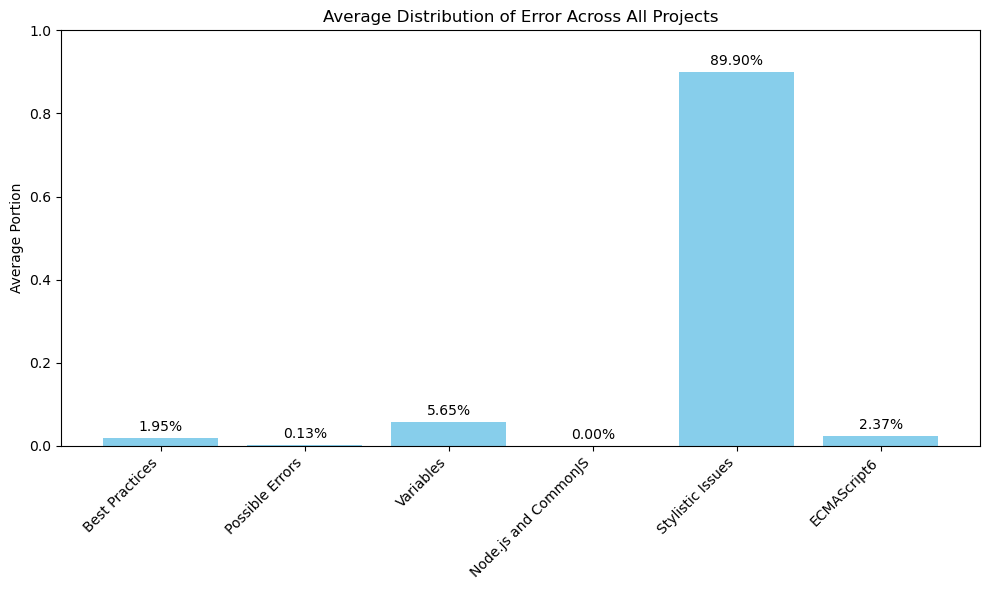

In [6]:

error_types = error_average.index
mean_values = error_average.values

plt.figure(figsize=(10, 6))
bars = plt.bar(error_types, mean_values, color='skyblue')


for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom')

plt.xlabel('')
plt.ylabel('Average Portion')
plt.title('Average Distribution of Error Across All Projects')

# Rotate x-labels for better readability
plt.xticks(rotation=45, ha='right')

plt.ylim(0, 1)  # Set y-axis limits to ensure the mean values are within the range [0, 1]
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Minimum: 74.8142%
Maximum: 100.0000%
First Quartile (Q1): 88.0952%
Median: 92.8467%
Third Quartile (Q3): 96.9611%
Mean: 89.8973%


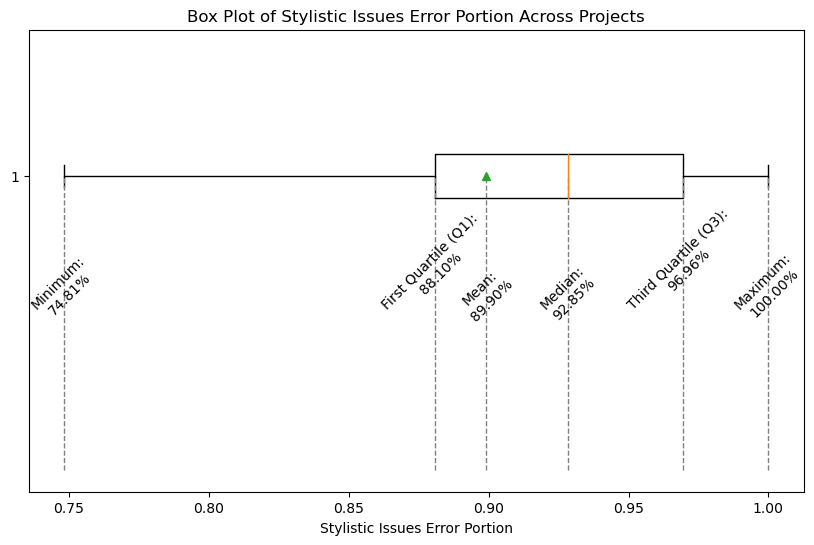

In [7]:
# Create boxplot for error type "'Stylistic Issues'"
stylistic_issues_distribution = error_portion['Stylistic Issues']

plt.figure(figsize=(10, 6))
box = plt.boxplot(stylistic_issues_distribution, vert=False, showfliers=False, showmeans=True)

# Extract statistics from the boxplot
stats = {
    'Minimum': box['whiskers'][0].get_xdata()[1],
    'Maximum': box['whiskers'][1].get_xdata()[1],
    'First Quartile (Q1)': box['boxes'][0].get_xdata()[0],
    'Median': box['medians'][0].get_xdata()[0],
    'Third Quartile (Q3)': box['boxes'][0].get_xdata()[2],
    'Mean': box['means'][0].get_xdata()[0],
}

# Display statistics on the plot 
for stat, value in stats.items():
    print(f'{stat}: {value:.4%}')
    plt.plot([value, value], [0, 1], color='gray', linestyle='--', linewidth=1)  # Line connecting the spot to the x-axis
    plt.text(value, 0.5, f'{stat}:\n{value:.2%}', rotation=45, ha='center', va='bottom')  # Adjust the vertical position

plt.plot([stats['Minimum'], stats['Minimum']], [0.2, 0.2], color='red', linestyle='-', linewidth=1.5)  # Line connecting minimum to y-axis
plt.plot([stats['Maximum'], stats['Maximum']], [0.2, 0.2], color='blue', linestyle='-', linewidth=1.5)  # Line connecting maximum to y-axis

plt.xlabel('Stylistic Issues Error Portion')
plt.title('Box Plot of Stylistic Issues Error Portion Across Projects')
plt.show()


In [8]:
# Read JSON file, which contains the definition of each errors
json_file_path = 'rulesCategory.json'

with open(json_file_path, 'r') as file:
    error_rules = json.load(file)

# Create individual DataFrames for each error type
error_dataframes = {}

for error_type in error_rules:
    error_dataframes[error_type['type']] = df[['projectName'] + [error_type['type']] + error_type['rules']].copy()


In [9]:
# Dataset contain error type "Possible Errors" and its corresponding rules
Possible_Errors_df = error_dataframes['Possible Errors']

# Dataset contain error type "Best Practices" and its corresponding rules
Best_Practices_df = error_dataframes['Best Practices']

# Dataset contain error type "Variables" and its corresponding rules
Variables_df = error_dataframes['Variables']

# Dataset contain error type "Node.js and CommonJS" and its corresponding rules
Node_CommonJS_df = error_dataframes['Node.js and CommonJS']

# Dataset contain error type "Stylistic Issues" and its corresponding rules
Stylistic_Issues_df = error_dataframes['Stylistic Issues']

# Dataset contain error type "ECMAScript6" and its corresponding rules
ECMAScript6_df = error_dataframes['ECMAScript6']

Stylistic_Issues_df.head()

,projectName,Stylistic Issues,array-bracket-newline,array-bracket-spacing,array-element-newline,block-spacing,brace-style,camelcase,capitalized-comments,comma-dangle,...,space-before-blocks,space-before-function-paren,space-in-parens,space-infix-ops,space-unary-ops,spaced-comment,switch-colon-spacing,template-tag-spacing,unicode-bom,wrap-regex
0,leetcode-the-hard-way,243,0,0,0,4,4,0,0,54,...,0,16,0,0,0,0,0,0,0,0
1,osm-community-index,238,0,0,0,0,0,0,0,1,...,0,10,0,0,0,0,0,0,0,0
2,zigbee-OTA,281,0,0,0,0,0,0,0,3,...,0,5,0,0,0,0,0,0,0,0
3,escrcpy,332,0,0,0,0,21,0,0,221,...,0,77,0,0,0,0,0,0,0,0
4,HostlistsRegistry,340,0,0,0,0,0,0,0,15,...,0,0,0,0,0,0,0,0,0,0


In [14]:

# Calculate the mean portion of each rules for error Stylistic issues
stylistic_issues_means = Stylistic_Issues_df.drop(columns=['projectName']).mean()
sorted_rules = stylistic_issues_means[1:].sort_values(ascending=False)
sorted_rules.shape

(87,)

/tmp/ipykernel_270/3030211418.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wedges, texts, autopcts = ax.pie(top_rules.append(pd.Series([combined_value], index=[combined_label])),


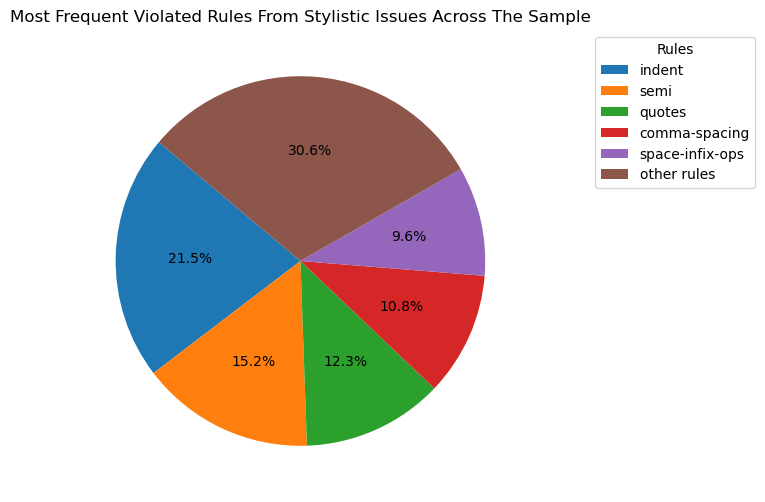

In [11]:
top_rules = sorted_rules.head(5)
other_rules = sorted_rules.iloc[5:]

# Combine other rules into a single value
combined_value = other_rules.sum()
combined_label = f'other rules'

# Plot the pie chart with the top 5 rules and "Other"
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autopcts = ax.pie(top_rules.append(pd.Series([combined_value], index=[combined_label])),
                                 autopct='%1.1f%%', startangle=140)

# Add percentages to each slice
for autopct, label in zip(autopcts, top_rules.index.append(pd.Index([combined_label]))):
    autopct.set_text(f'{autopct.get_text()}')

# Create a legend with labels and corresponding colors
legend_labels = top_rules.index.append(pd.Index([combined_label]))
ax.legend(wedges, legend_labels, title="Rules", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Most Frequent Violated Rules From Stylistic Issues Across The Sample')
plt.show()

In [23]:
# Add percentages to each slice
for autopct, label in zip(autopcts, top_rules.index.append(pd.Index([combined_label]))):
    percentage_value = float(autopct.get_text().strip('%'))  # Extract numeric value from percentage string
    print(f'{label}: {percentage_value:.1f}%')

indent: 29.3%
semi: 18.0%
quotes: 10.4%
comma-spacing: 5.4%
space-infix-ops: 5.4%
Other Rules: 31.5%


In [17]:
# Calculate the portion of each rule for each project
all_rules = df.columns[8:]
average_rules_portion = df[all_rules].div(df['Total Errors'], axis=0).mean()

average_rules_portion = pd.DataFrame({'Rule': average_rules_portion.index, 'Average Portion': average_rules_portion.values})


In [18]:
# Sort the rules based on average portion in descending order
average_rules_portion_sorted = average_rules_portion.sort_values(by='Average Portion', ascending=False)

print(average_rules_portion_sorted)

                      Rule  Average Portion
140                   semi         0.292912
112                 indent         0.179813
128                 quotes         0.103835
46                no-undef         0.054347
50            comma-dangle         0.053685
..                     ...              ...
116       no-unused-labels         0.000000
118              max-depth         0.000000
123            no-iterator         0.000000
125  array-element-newline         0.000000
244           no-undefined         0.000000

[245 rows x 2 columns]


/tmp/ipykernel_245/3580835225.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wedges, texts, autopcts = ax.pie(top5_rules['Average Portion'].append(pd.Series([combined_value], index=[combined_label])),
/tmp/ipykernel_245/3580835225.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  legend_labels = top5_rules['Rule'].append(pd.Series([combined_label]))


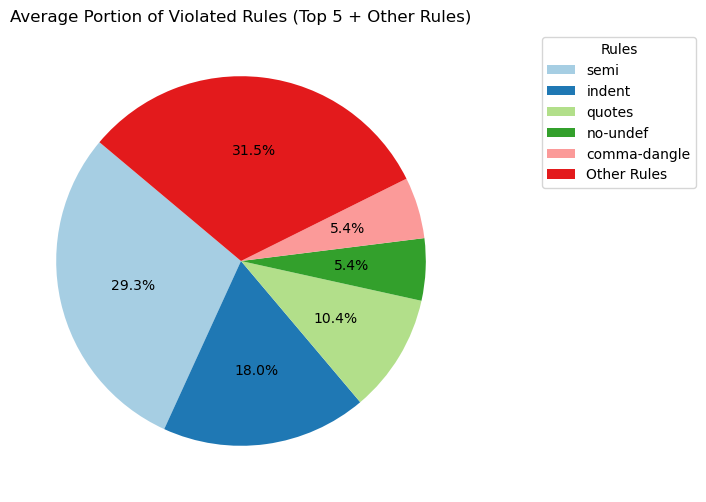

In [20]:
# Extract the top 5 most frequent violated rules
top5_rules = average_rules_portion_sorted.head(5)

# Combine other rules into a single value
combined_value = average_rules_portion_sorted.iloc[5:]['Average Portion'].sum()
combined_label = 'Other Rules'

# Plot the pie chart with the top 5 rules and "Other Rules"
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autopcts = ax.pie(top5_rules['Average Portion'].append(pd.Series([combined_value], index=[combined_label])),
                                 autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add percentages to each slice
for autopct, text in zip(autopcts, texts):
    autopct.set_text(f'{autopct.get_text()}')

# Create a legend with labels and corresponding colors
legend_labels = top5_rules['Rule'].append(pd.Series([combined_label]))
ax.legend(wedges, legend_labels, title="Rules", loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Average Portion of Violated Rules (Top 5 + Other Rules)')
plt.show()
